In [4]:
pip install wordcloud requests beautifulsoup4 matplotlib konlpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install fake-useragent

Note: you may need to restart the kernel to use updated packages.


In [1]:
from tqdm import tqdm_notebook
import urllib.request
import time
import requests

from bs4 import BeautifulSoup
from wordcloud import WordCloud

from konlpy.tag import Okt

import numpy as np
import pandas as pd

import platform
import matplotlib.pyplot as plt

%matplotlib inline

# wordcloud 라이브러리에서 WordCloud 클래스와 STOPWORDS 세트가져오기
from wordcloud import WordCloud, STOPWORDS

# Python 이미징 라이브러리(PIL) 가져오기
from PIL import Image

#한글 폰트 문제 해결
path = "c:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Sorry')

# 마이너스 기호가 깨지는 문제를 해결
plt.rcParams['axes.unicode_minus'] = False

# 웹 스크래핑을 위한 BeautifulSoup와 urllib을 import 
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

# 상태 진행 바 설치
!pip show ipywidgets
!pip install ipywidgets --upgrade

Name: ipywidgets
Version: 8.1.2
Summary: Jupyter interactive widgets
Home-page: http://jupyter.org
Author: Jupyter Development Team
Author-email: jupyter@googlegroups.com
License: BSD 3-Clause License
Location: C:\Users\niceq\anaconda3\Lib\site-packages
Requires: comm, ipython, jupyterlab-widgets, traitlets, widgetsnbextension
Required-by: jupyter


In [2]:
# 검색할 질의어 설정
query = "파이썬"

# 검색 결과 페이지 URL
url = f"https://search.naver.com/search.naver?ssc=tab.news.all&where=news&sm=tab_jum&query={query}"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# 파이썬 기사에 대한 후보 텍스트를 저장할 리스트를 초기화.
python_article_text = []  

start_num = 0  # 변수 초기화

# 범위 내에서 페이지를 반복하여 검색 결과를 가져오는 반복문.
for n in tqdm_notebook(range(1, 100, 10)):
    # 현재 페이지 URL
    page_url = f"{url}&start={start_num}"
    
    # HTTP GET 요청 보내고 응답 받기
    response = requests.get(page_url)
    
    # BeautifulSoup을 사용하여 HTML을 파싱.
    soup = BeautifulSoup(response.text, "html.parser")
  
    # HTML에서 모든 <div> 태그를 찾아서 가져옴.
    tmp = soup.find_all('div')
    
    # 각 태그에서 텍스트를 추출하여 python_article__text 리스트에 추가.
    for line in tmp:
        python_article_text.append(line.text)
    
    # 서버에 부담을 주지 않기 위해 0.5초의 간격을 두고 잠시 대기.
    time.sleep(0.5)

C:\Users\niceq\AppData\Local\Temp\ipykernel_9556\2164558995.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(range(1, 100, 10)):


  0%|          | 0/10 [00:00<?, ?it/s]

In [3]:
python_article_text

['',
 ' 메뉴 영역으로 바로가기 본문 영역으로 바로가기 ',
 '     NAVER   검색                    한글 입력기 입력도구       자동완성 레이어검색 레이어     최근 검색어  전체삭제     검색어 저장 기능이 꺼져 있습니다.설정이 초기화 된다면 도움말을 확인해 주세요. 최근 검색어 내역이 없습니다.설정이 초기화 된다면 도움말을 확인해 주세요.    자동저장 끄기 도움말   닫기       CUE대화하듯 질문해 보세요이 정보가 표시된 이유  검색어와 포함된 키워드를 기반으로 AI 기술을 활용하여 연관된 추천 질문을 제공합니다. 레이어 닫기      이전 다음             자세히 보기     관심사를 반영한 컨텍스트 자동완성도움말   컨텍스트 자동완성   컨텍스트 자동완성  ON/OFF 설정은 해당기기(브라우저)에 저장됩니다.  자세히 보기    동일한 시간대・연령대・남녀별 사용자 그룹의 관심사에 맞춰 자동완성을 제공합니다. 자세히 보기  네이버로그인   컨텍스트 자동완성 레이어 닫기      자동완성 끄기 도움말 신고   닫기        검색 검색              전체뉴스이미지블로그카페지식iN인플루언서동영상쇼핑어학사전지도도서지식백과학술정보   이전 다음     더보기   전체뉴스이미지블로그카페지식iN인플루언서동영상쇼핑어학사전지도도서지식백과학술정보  검색옵션       공유      파이썬 뉴스검색 결과                          관련도순 최신순   모바일 메인 언론사    옵션    옵션      정렬  관련도순 최신순 오래된순    서비스 영역  전체 모바일 메인 언론사 PC 메인 언론사      기간  전체 1시간옵션펼치기접기 1일 1주 1개월 3개월 6개월 1년 직접입력옵션펼치기접기    시간선택     1시간 2시간 3시간 4시간 5시간 6시간     기간 설정시작       기간 설정끝     년(Year)       월(Month)       일(Day)      적용   유형

In [4]:
import nltk
from konlpy.tag import Okt; o = Okt()

In [5]:
# python_article_text 리스트에서 처음 100개의 요소를 가져와서 하나의 문자열인 present_text에 추가

#python_text 변수를 빈 문자열('')로 초기화
python_text = ''

# for 루프를 사용하여 python_article_text의 각 요소를 순회
for each_line in python_article_text[:100]: # python_article_text 리스트의 처음 100개의 요소를 가져옴

# 각 요소를 python_text 문자열에 추가(줄바꿈 문자('\n')를 추가하여 한 줄씩 새로운 텍스트로 구분)
    python_text = python_text + each_line + '\n'

In [6]:
tokens_ko = o.morphs(python_text)
tokens_ko

['\n ',
 '메뉴',
 '영역',
 '으로',
 '바로가기',
 '본문',
 '영역',
 '으로',
 '바로가기',
 'NAVER',
 '검색',
 '한글',
 '입력기',
 '입력',
 '도구',
 '자동',
 '완성',
 '레이어',
 '검색',
 '레이어',
 '최근',
 '검색어',
 '전체',
 '삭제',
 '검색어',
 '저장',
 '기능',
 '이',
 '꺼져',
 '있습니다',
 '.',
 '설정',
 '이',
 '초기',
 '화',
 '된다면',
 '도움말',
 '을',
 '확인',
 '해',
 '주세요',
 '.',
 '최근',
 '검색어',
 '내',
 '역',
 '이',
 '없습니다',
 '.',
 '설정',
 '이',
 '초기',
 '화',
 '된다면',
 '도움말',
 '을',
 '확인',
 '해',
 '주세요',
 '.',
 '자동',
 '저장',
 '끄기',
 '도움말',
 '닫기',
 'CUE',
 '대화',
 '하',
 '듯',
 '질문',
 '해',
 '보세요',
 '이',
 '정보',
 '가',
 '표시',
 '된',
 '이유',
 '검색어',
 '와',
 '포함',
 '된',
 '키',
 '워드',
 '를',
 '기반',
 '으로',
 'AI',
 '기술',
 '을',
 '활용',
 '하여',
 '연관',
 '된',
 '추천',
 '질문',
 '을',
 '제공',
 '합니다',
 '.',
 '레이어',
 '닫기',
 '이전',
 '다음',
 '자세히',
 '보기',
 '관심사',
 '를',
 '반영',
 '한',
 '컨',
 '텍스트',
 '자동',
 '완성',
 '도움말',
 '컨',
 '텍스트',
 '자동',
 '완성',
 '컨',
 '텍스트',
 '자동',
 '완성',
 'ON',
 '/',
 'OFF',
 '설정',
 '은',
 '해당',
 '기기',
 '(',
 '브라우저',
 ')',
 '에',
 '저장',
 '됩니다',
 '.',
 '자세히',
 '보기',
 '동일한',
 '시간대',
 '・',
 '연령'

In [7]:
ko = nltk.Text(tokens_ko, name='파이썬')
print(len(ko.tokens))
print(len(set(ko.tokens)))

9299
706


In [8]:
ko = nltk.Text(tokens_ko, name='파이썬')
ko.vocab().most_common(100)

[('.', 190),
 (',', 150),
 ('파이썬', 145),
 ('을', 128),
 ('이', 124),
 ('저장', 117),
 ('에', 112),
 ('(', 106),
 ('자동', 99),
 ('전', 92),
 ('언론사', 91),
 (')', 86),
 ('옵션', 86),
 ('AI', 85),
 ('완성', 84),
 ('Keep', 80),
 ('으로', 79),
 ('은', 74),
 ('선택', 68),
 ('전체', 67),
 ('가', 67),
 ('...', 64),
 ('도움말', 62),
 ('하기', 62),
 ('의', 60),
 ('를', 59),
 ('보기', 59),
 ('닫기', 58),
 ('된', 57),
 ('설정', 56),
 ('검색어', 55),
 ('정보', 55),
 ('컨', 52),
 ('텍스트', 52),
 ("'", 52),
 ('레이어', 48),
 ('조', 48),
 ('뉴스', 47),
 ('순', 46),
 ('도', 44),
 ('바로가기', 42),
 ('검색', 42),
 ('제공', 42),
 ('자세히', 42),
 ('/', 42),
 ('문서', 40),
 ('한', 39),
 ('해', 37),
 ('지식', 36),
 ('는', 36),
 ('과', 34),
 ('펼치기', 32),
 ('접기', 32),
 ('"', 32),
 ('개발자', 32),
 ('특강', 32),
 ('초기', 30),
 ('화', 30),
 ('확인', 30),
 ('인', 30),
 ('됩니다', 29),
 ('메인', 29),
 ('합니다', 28),
 ('・', 28),
 ('·', 28),
 ('△', 28),
 ('최근', 27),
 ('기능', 27),
 ('질문', 27),
 ('관심사', 27),
 ('개월', 27),
 ('3', 27),
 ('활용', 26),
 ('별', 26),
 ('로', 26),
 ('이전', 25),
 ('다음', 25),
 ('기간'

In [9]:
# 불용어처리(여러 번 수행)
stop_words = [',', '을', '은', '는', '이', '가', 'keep', '(', '으로', '...',
              '하기', '의', '를', '된', '컨', '조', '순', '도', '바로가기',
              '자세히', '/', '한', '해', '・', '', '△', '·', '3', '개월', '로',
              '된다면', '주세요', '지', '에서', '등', '40', '1', '와', '끄기',
             '.','에','언론사',')','보기','닫기','도움말','전체','선택','keep',"'", 
             '과','펼치기','접기','화','인','-','언','하','1시간','"', ]

#용어가 제거된 텍스트를 기반으로 nltk 라이브러리의 Text 객체를 생성
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='파이썬')
ko.vocab().most_common(50)

[('파이썬', 145),
 ('저장', 117),
 ('자동', 99),
 ('전', 92),
 ('옵션', 86),
 ('AI', 85),
 ('완성', 84),
 ('Keep', 80),
 ('설정', 56),
 ('검색어', 55),
 ('정보', 55),
 ('텍스트', 52),
 ('레이어', 48),
 ('뉴스', 47),
 ('검색', 42),
 ('제공', 42),
 ('문서', 40),
 ('지식', 36),
 ('개발자', 32),
 ('특강', 32),
 ('초기', 30),
 ('확인', 30),
 ('됩니다', 29),
 ('메인', 29),
 ('합니다', 28),
 ('최근', 27),
 ('기능', 27),
 ('질문', 27),
 ('관심사', 27),
 ('활용', 26),
 ('별', 26),
 ('이전', 25),
 ('다음', 25),
 ('기간', 25),
 ('센터', 25),
 ('동영상', 24),
 ('관련', 24),
 ('앱', 24),
 ('개발', 24),
 ('코딩', 24),
 ('서울', 24),
 ('빅데이터', 24),
 ('샌드박스', 24),
 ('기반', 22),
 ('기술', 22),
 ('네이버', 22),
 ('영역', 21),
 ('6시간', 21),
 ('일', 21),
 ('유지', 21)]

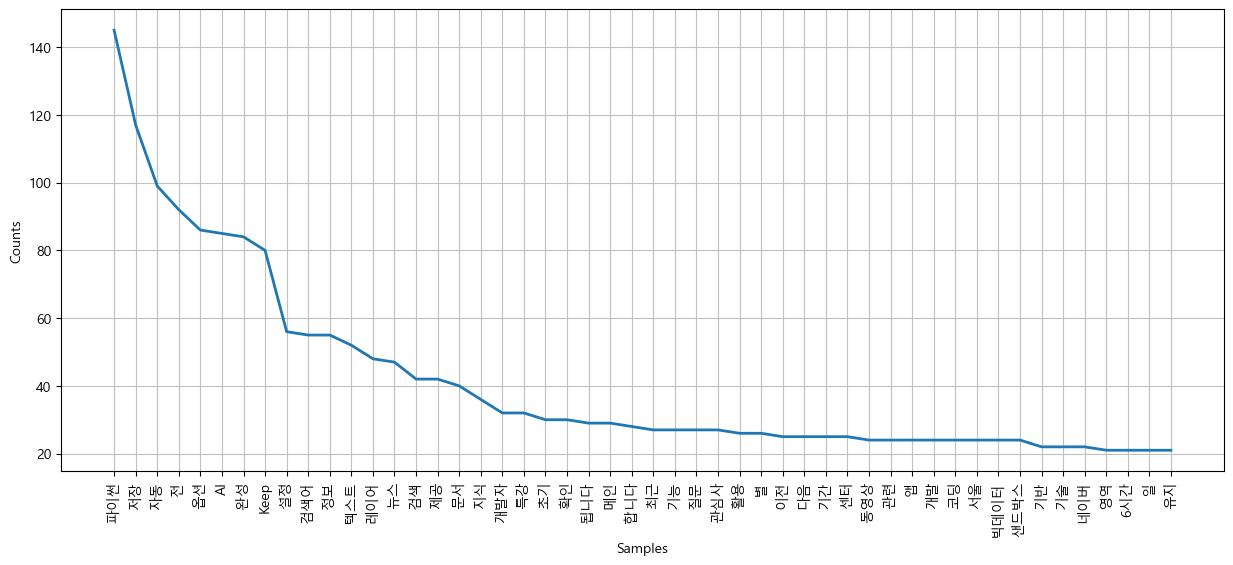

In [10]:
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

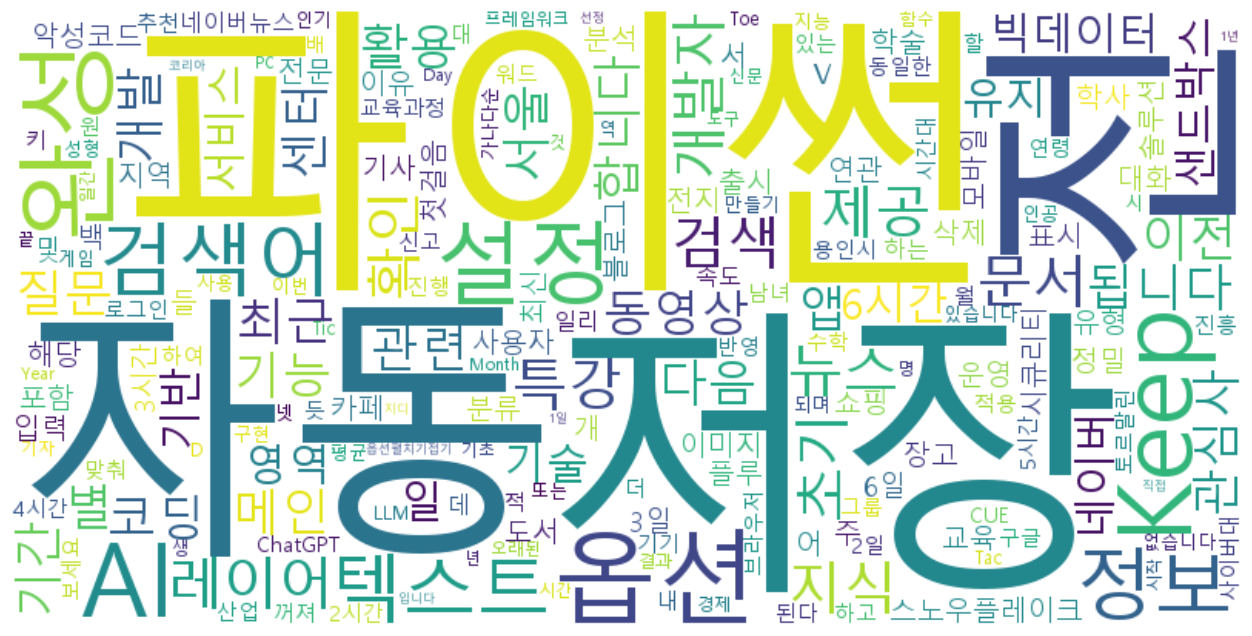

In [11]:
# 데이터 준비
data = ko.vocab().most_common(300)

# 워드클라우드 객체 생성 (폰트 지정)
wordcloud = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
                      relative_scaling=0.5,  # 상대적인 크기 조정값 설정
                      background_color='white',  # 배경은 흰색
                      width=800, height=400  # 이미지의 가로와 세로 크기 설정
                      )

# 텍스트 생성
text = "\n".join([f"{word}: {freq}" for word, freq in data])

# 워드클라우드 생성
wordcloud.generate(text)

# 이미지 출력
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
from PIL import Image, ImageOps  # ImageOps 추가

In [22]:
#이미지 마스크 생성 (이미지 파일을 열어 Numpy 배열로 변환 후 mask 변수에 저장)
mask = np.array(Image.open('../Data/09. heart.jpg')) #이미지 마스크 생성

# 워드클라우드의 색상을 지정하기 위해 이미지 색상 생성기 import
from wordcloud import ImageColorGenerator

# 마스크 이미지의 색상 정보를 가져와서 ImageColorGenerator 객체 생성
image_colors = ImageColorGenerator(mask)

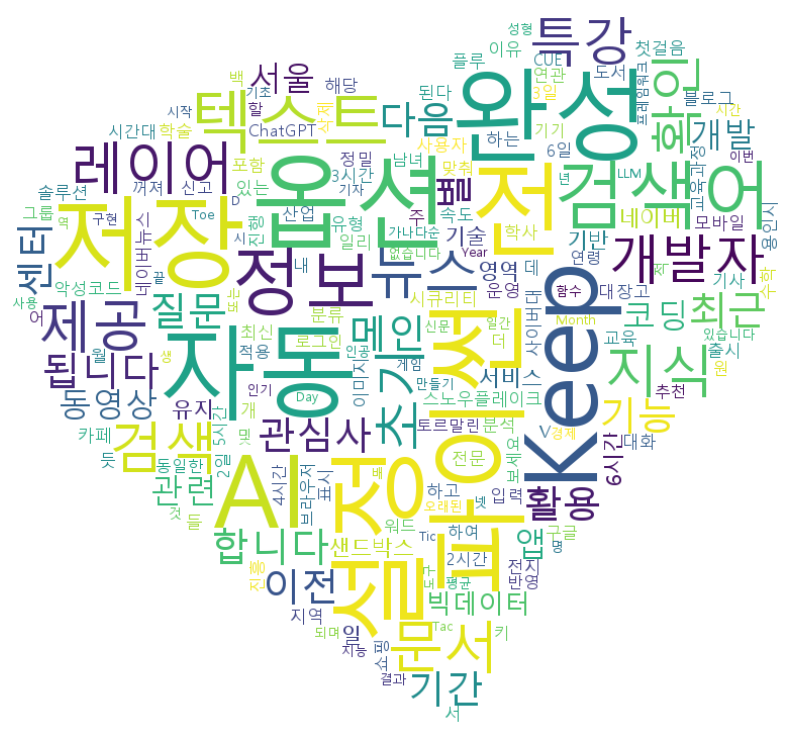

In [24]:
# 가장 빈번하게 등장하는 단어 200개를 추출
data = ko.vocab().most_common(200)

# 워드클라우드 객체 생성 (폰트 지정)
wordcloud = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
                      relative_scaling=0.1, mask=mask, # 상대적인 크기 조정값 설정
                      background_color='white',  # 배경은 흰색
                      min_font_size=1,
                      max_font_size=100)  # 이미지의 가로와 세로 크기 설정

# 텍스트 생성
text = "\n".join([f"{word}: {freq}" for word, freq in data])

# 워드클라우드 생성
wordcloud.generate(text)

default_colors = wordcloud.to_array()

# 이미지 출력
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
okt = Okt()
results = []
lines = python_article_text

for line in lines:
    malist = okt.pos(line, norm=True, stem=True)
    r = []

    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])

    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)


메뉴 영역 바로가기 본문 영역 바로가기
NAVER 검색 한글 입력기 입력 도구 자동 완성 레이어 검색 레이어 최근 검색어 전체 삭제 검색어 저장 기능 꺼지다 있다 설정 초기 화 되다 도움말 확인 하다 줄다 최근 검색어 내 역 없다 설정 초기 화 되다 도움말 확인 하다 줄다 자동 저장 끄다 도움말 닫다 CUE 대화 하 듯 질문 하다 보다 이 정보 표시 되다 이유 검색어 포함 되다 키 워드 기반 AI 기술 활용 하다 연관 되다 추천 질문 제공 하다 레이어 닫다 이전 다음 자세하다 보기 관심사 반영 컨 텍스트 자동 완성 도움말 컨 텍스트 자동 완성 컨 텍스트 자동 완성 ON OFF 설정 해당 기기 브라우저 저장 되다 자세하다 보기 동일하다 시간대 ・ 연령 대 ・ 남녀 별 사용자 그룹 관심사 맞추다 자동 완성 제공 하다 자세하다 보기 네이버 로그인 컨 텍스트 자동 완성 레이어 닫다 자동 완성 끄다 도움말 신고 닫다 검색 검색 전체 뉴스 이미지 블로그 카페 지식 iN 인 플루 언 서 동영상 쇼핑 어 학사 전지 도서 지식 백 학술 정보 이전 다음 더 보기 전체 뉴스 이미지 블로그 카페 지식 iN 인 플루 언 서 동영상 쇼핑 어 학사 전지 도서 지식 백 학술 정보 검색 옵션 공유 파이썬 뉴스 검색 결과 관련 순 최신 순 모바일 메인 언론사 옵션 옵션 정렬 관련 순 최신 순 오래되다 순 서비스 영역 전체 모바일 메인 언론사 PC 메인 언론사 기간 전체 1시간 옵션펼치기접기 1일 1 주 1 개월 3 개월 6 개월 1년 직접 입력 옵션 펼치다 접기 시간 선택 1시간 2시간 3시간 4시간 5시간 6시간 기간 설정 시작 기간 설정 끝 년 Year 월 Month 일 Day 적용 유형 전체 포토 동영상 지면 기사 보도자료 자 동생 성기사 언론사 전체 유형 별 옵션 펼치다 접기 언론사 분류 순 옵션 펼치다 접기 지역 언론사 별 옵션 펼치다 접기 가나다순 옵션 펼치다 접기 유형 선택 일간 방송 통신 경제 IT 인터넷 신문 스포츠 연예 지역 매다 전문 기타 언론사 분류 선택 언론사 선택 

In [26]:
data_file = 'py_article.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

In [37]:
# Word2Vec 임포트
from gensim.models import Word2Vec

# 파일 경로
data_file = 'py_article.data'

# 문장 단위로 읽어들이기
sentences = word2vec.LineSentence(data_file)

# 모델 학습
model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

# 학습된 모델 저장
model.save('py_article.model')

In [38]:
model = word2vec.Word2Vec.load('py_article.model')

In [42]:
model.wv.most_similar(positive=['파이썬'])

[('독학', 0.6740446090698242),
 ('연산자', 0.6540082693099976),
 ('자격증', 0.6345350742340088),
 ('리스트', 0.6029566526412964),
 ('설치', 0.5675491094589233),
 ('기초', 0.5423146486282349),
 ('책', 0.5032370090484619),
 ('문법', 0.4960373342037201),
 ('조건문', 0.49228909611701965),
 ('반복', 0.48553112149238586)]

In [43]:
model.wv.most_similar(positive=['조건문'])

[('문법', 0.977831244468689),
 ('반복', 0.97723788022995),
 ('문', 0.9281535744667053),
 ('기초', 0.8742808103561401),
 ('이해', 0.8544561862945557),
 ('독학', 0.7410960793495178),
 ('또는', 0.7368664145469666),
 ('수강생', 0.7241809964179993),
 ('재학생', 0.7202790379524231),
 ('자격증', 0.6943711042404175)]

In [44]:
model.wv.most_similar(positive=['조건문','리스트'])

[('연산자', 0.9180801510810852),
 ('독학', 0.8994470834732056),
 ('문법', 0.8893733620643616),
 ('반복', 0.8520768880844116),
 ('기초', 0.8403688669204712),
 ('자격증', 0.8080122470855713),
 ('책', 0.7897411584854126),
 ('설치', 0.7675966620445251),
 ('문', 0.7644275426864624),
 ('또는', 0.6961368918418884)]

In [45]:
model.wv.most_similar(positive=['연산자'], negative=['책'])

[('첫걸음', 0.5454959869384766),
 ('워드', 0.5436310172080994),
 ('코딩', 0.5249343514442444),
 ('키', 0.5077608823776245),
 ('있다', 0.5061649680137634),
 ('수강생', 0.5058771967887878),
 ('Tic', 0.49970558285713196),
 ('또는', 0.4939230680465698),
 ('위해', 0.49089404940605164),
 ('기반', 0.49005043506622314)]